# Customer Analytics for Leading E-Commerce Company

### Objective of Business Problem:
One of the leading e-commerce companies in India would like to analyse their transaction data and understand the drivers for churners and high spenders. Along with that, the company want to understand overall customer behaviour so that they can define the strategy to improve the revenues/margins.
In order to answer the above problem, the team provided data files as follows.
- Customer: Customer level information
- Product: Product Hierarchy information
- Transactions: Transaction information (orders information)
- Data Dictionary: Description about the tables & fields

### What do you require to work?
In order to achieve the solution, 
1. The team would like you to work on the “Customer360 data set” using instructions (description) provided in “Customer360 Instruction.xlsx”. As part of this file, every record will be at customer level (aggregating the information at customer level). 
2. Once we created Customer 360 data set created from step-1, you require to perform below analysis 
  - Identify key drivers of churners (You can build classification model using Churn_flag as dependent variable)
  - Identify key drivers of High spenders (You can build classification model using High_spenders_flag as dependent variable)
  - Uderstand customer behavior (Knowing about customers) (You can build different types of segmentation & Profiling to identify characteristics)


# Note: This code may not work with pandas old version (<0.25 version). If so, you need to install Pandas latest version <>0.25.) 

In [1]:
import pandas as pd
pd.__version__

'1.2.4'

In [4]:
#Packages related to general operating system & warnings
import os 
import warnings
warnings.filterwarnings('ignore')

#Packages related to data importing, manipulation, exploratory data analysis, data understanding
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import pandas_profiling
import scipy.stats as stats

#Packages related to data visualizaiton
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Setting plot sizes and type of plot
plt.rc("font", size=14)
plt.rcParams['axes.grid'] = True
plt.figure(figsize=(6,3))
plt.gray()

from matplotlib.backends.backend_pdf import PdfPages

#Modules related to split the data & gridsearch
from sklearn.model_selection import train_test_split, GridSearchCV

#Module related to calculation of metrics
from sklearn import metrics

#Module related to VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Modules related to preprocessing (Imputation of missings, standardiszation, new features creation, converting categorical to numerical)
from sklearn.impute import MissingIndicator, SimpleImputer
#from sklearn.preprocessing import Imputer, PolynomialFeatures, KBinsDiscretizer, FunctionTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, LabelBinarizer, OrdinalEncoder

#Moudles related to feature selection
from sklearn.feature_selection import RFE, RFECV, SelectKBest, chi2, SelectPercentile, f_classif, mutual_info_classif, f_regression, VarianceThreshold, SelectFromModel, mutual_info_classif, mutual_info_regression, SelectFpr, SelectFdr, SelectFwe


#Modules related to pipe line creation for faster processing
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
#from sklearn.features.transformers import DataFrameSelector

#Modules related to saving python objects permanantly
#from sklearn.externals import joblib

#Dumping model into current directory: joblib.dump(model_xg,"my_model.pkl") 
#Loading model: my_model_loaded=joblib.load("my_model.pkl")

#Modules related key techniques of supervised learning 
import statsmodels.formula.api as smf

from sklearn.linear_model import LogisticRegression, LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz, export
from sklearn.ensemble import BaggingClassifier, BaggingRegressor,RandomForestClassifier,RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier,GradientBoostingRegressor, AdaBoostClassifier, AdaBoostRegressor 
from xgboost import XGBClassifier, XGBRegressor
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from sklearn.svm import LinearSVC, LinearSVR, SVC, SVR
from sklearn.neural_network import MLPClassifier, MLPRegressor

ImportError: cannot import name 'export' from 'sklearn.tree' (C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\__init__.py)

<Figure size 600x300 with 0 Axes>

In [5]:
## Load the data
cust=pd.read_csv('Customer.csv', sep=",")
tran=pd.read_csv('Transactions.csv', sep=",")
prod=pd.read_csv('Product.csv', sep=",")


In [6]:
tran.head()

,USER_ID,order id,merchant id,product id,order time,sale amount,sale price,sale number,web portal price,ACTIVITY ID
0,12592130,29501392,1,1143312,20120102,0.00,0.00,1,0.0,14647
1,36438353,29482570,1,1739650,20120102,0.00,0.00,1,69.0,14264
2,73897605,29453567,1,1288235,20120102,0.31,0.51,1,5.1,13679
3,85462069,29506684,1,964626,20120102,0.89,1.00,1,1.7,10885
4,70491566,29412642,1,14264,20120101,1.20,1.20,1,9.9,10818


In [4]:
cust.columns

Index(['Customer ID', 'Gender', 'first Date', 'recent date', 'Customer value',
       'buy times', 'Points earned', 'Points redeemed'],
      dtype='object')

In [5]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22604 entries, 0 to 22603
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer ID      22604 non-null  int64  
 1   Gender           22604 non-null  object 
 2   first Date       22604 non-null  int64  
 3   recent date      22604 non-null  int64  
 4   Customer value   22604 non-null  float64
 5   buy times        22604 non-null  int64  
 6   Points earned    22604 non-null  int64  
 7   Points redeemed  2996 non-null   float64
dtypes: float64(2), int64(5), object(1)
memory usage: 1.4+ MB


In [52]:
tran.columns

Index(['USER_ID', 'order_id', 'merchant_id', 'product_id', 'order_time',
       'sale_amount', 'sale_price', 'sale_number', 'web_portal_price',
       'ACTIVITY_ID'],
      dtype='object')

In [3]:
tran

NameError: name 'tran' is not defined

In [53]:
prod.columns

Index(['PRODUCT_ID', 'PRODUCT_CODE', 'merchant_id', 'merchant_name_eng',
       'Category_level2_name_eng', 'cost_price', 'Category_code'],
      dtype='object')

In [6]:
#Renaming the columsns by replacing special characters with underscore
tran.columns = [ i.replace(' ', '_') for i in tran.columns]
prod.columns = [ i.replace(' ', '_') for i in prod.columns]
cust.columns = [ i.replace(' ', '_') for i in cust.columns]

In [7]:
tran1 = pd.merge(tran, prod, how='inner', left_on = ['product_id', 'merchant_id'], right_on = ['PRODUCT_ID', 'merchant_id'])
# tran1 = tran1[tran1.order_time >= 20120401]

In [8]:
tran1['trans_date'] = pd.to_datetime(tran1.order_time.astype(str))
tran1['period'] = np.where(((tran1.order_time>=20120401) & (tran1.order_time<20120930)), 'P1', np.where(((tran1.order_time>=20121001) & (tran1.order_time<20130331)),'P2',np.nan))
tran1['act_amt'] = tran1.sale_amount * tran1.sale_number
tran1['cost_amt'] = tran1.cost_price * tran1.sale_number
tran1['margin'] = tran1.sale_amount - tran1.cost_amt
tran1['discount'] = tran1.act_amt - tran1.sale_amount
tran1['WeekEnd_Flag'] = np.where(((tran1['trans_date']).dt.dayofweek) < 5,"WeekDay","WeekEnd")
tran1['Promo_Flag'] = np.where(tran1.ACTIVITY_ID==999999999, 'No_Promo', 'Promo')
tran1['First_purchase'] =  np.where(tran1.trans_date == tran1.trans_date.min() , 1, 0)
tran1['Recent_purchase'] =  np.where(tran1.trans_date == tran1.trans_date.max() , 1, 0)

tran1['New_cat'] = np.where(tran1.Category_level2_name_eng == 'Food', 'Food',
                   np.where(tran1.Category_level2_name_eng == 'Kitchen cleaning', 'Kitchen_Clean',
                   np.where(tran1.Category_level2_name_eng == 'Beauty', 'Beauty',
                   np.where(tran1.Category_level2_name_eng == 'Imported food', 'Imported_Food',
                   np.where(tran1.Category_level2_name_eng == 'Drinks', 'Drinks',
                   np.where(tran1.Category_level2_name_eng == 'Mother and children', 'Mother_Child',
                   np.where(tran1.Category_level2_name_eng == 'Home', 'Home',
                   np.where(tran1.Category_level2_name_eng == 'Nutrition and health', 'Nutrition',
                   np.where(tran1.Category_level2_name_eng == 'Household electrical appliances', 'HH_Electrical',
                   np.where(tran1.Category_level2_name_eng == 'Computers, software, office supplies', 'Office_Computer',
                   np.where(tran1.Category_level2_name_eng == 'Digital', 'Digital',
                   np.where(tran1.Category_level2_name_eng == 'Mobile phones', 'Mobiles',
                   np.where(tran1.Category_level2_name_eng == 'Car related products', 'Cat_Car_prods', 'Others' )))))))))))))

In [9]:
tran1.drop(['order_id',  'order_time', 'web_portal_price', 'ACTIVITY_ID', 'PRODUCT_ID', 
            'PRODUCT_CODE', 'merchant_name_eng', 'Category_level2_name_eng'], axis=1, inplace=True)

In [10]:
#Customer Data
cust.rename(columns={"Customer_ID": "USER_ID"}, inplace=True)
cust.sort_values('USER_ID', inplace=True)

In [11]:
tran1.head()

,USER_ID,merchant_id,product_id,sale_amount,sale_price,sale_number,cost_price,Category_code,trans_date,period,act_amt,cost_amt,margin,discount,WeekEnd_Flag,Promo_Flag,First_purchase,Recent_purchase,New_cat
49,113867739,1,1143312,0.0,0.0,1,0.0,13,2012-08-10,P1,0.0,0.0,0.0,0.0,WeekDay,Promo,0,0,Nutrition
50,120289841,1,1143312,0.0,0.0,1,0.0,13,2012-08-15,P1,0.0,0.0,0.0,0.0,WeekDay,Promo,0,0,Nutrition
51,36105114,1,1143312,0.0,0.0,1,0.0,13,2012-08-15,P1,0.0,0.0,0.0,0.0,WeekDay,Promo,0,0,Nutrition
52,120618427,1,1143312,0.0,0.0,1,0.0,13,2012-08-23,P1,0.0,0.0,0.0,0.0,WeekDay,Promo,0,0,Nutrition
53,36105114,1,1143312,0.0,0.0,1,0.0,13,2012-10-21,P2,0.0,0.0,0.0,0.0,WeekEnd,Promo,0,0,Nutrition


In [14]:
tran1.groupby(["USER_ID","New_cat"])[['New_cat']].count()

New_cat
USER_ID   New_cat               
347       Food                21
585       Beauty               1
          Drinks               1
          HH_Electrical        6
          Home                 2
...                          ...
132473524 Imported_Food        1
132484207 Imported_Food        2
132489383 Imported_Food        2
132490575 Nutrition            3
132495965 Beauty               4

[78867 rows x 1 columns]

In [17]:
tran1.groupby(["USER_ID","New_cat"])[['New_cat']].count().add_prefix('no_').reset_index().pivot_table(index = "USER_ID",columns="New_cat",values="no_New_cat").sort_values(by="USER_ID").fillna(0).reset_index()

New_cat,USER_ID,Beauty,Cat_Car_prods,Digital,Drinks,Food,HH_Electrical,Home,Imported_Food,Kitchen_Clean,Mobiles,Mother_Child,Nutrition,Office_Computer,Others
0,347,0.0,0.0,0.0,0.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,585,1.0,0.0,0.0,1.0,0.0,6.0,2.0,0.0,7.0,0.0,0.0,0.0,54.0,0.0
2,885,4.0,0.0,0.0,14.0,41.0,0.0,0.0,6.0,62.0,0.0,0.0,1.0,11.0,0.0
3,1670,54.0,0.0,0.0,20.0,74.0,0.0,2.0,77.0,85.0,0.0,2.0,0.0,0.0,0.0
4,3934,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20328,132473524,0.0,0.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
20329,132484207,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
20330,132489383,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
20331,132490575,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0


In [19]:
#Product count by each category
cat_prod_cnt = tran1.groupby(["USER_ID","New_cat"])[['New_cat']].count().add_prefix('no_').reset_index().pivot_table(index = "USER_ID",columns="New_cat",values="no_New_cat").sort_values(by="USER_ID").fillna(0).reset_index()
cat_prod_cnt.columns = ['USER_ID'] + [ "cat_prod_cnt_"+i for i in cat_prod_cnt.columns[1:]]

In [20]:
cat_prod_cnt

,USER_ID,cat_prod_cnt_Beauty,cat_prod_cnt_Cat_Car_prods,cat_prod_cnt_Digital,cat_prod_cnt_Drinks,cat_prod_cnt_Food,cat_prod_cnt_HH_Electrical,cat_prod_cnt_Home,cat_prod_cnt_Imported_Food,cat_prod_cnt_Kitchen_Clean,cat_prod_cnt_Mobiles,cat_prod_cnt_Mother_Child,cat_prod_cnt_Nutrition,cat_prod_cnt_Office_Computer,cat_prod_cnt_Others
0,347,0.0,0.0,0.0,0.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,585,1.0,0.0,0.0,1.0,0.0,6.0,2.0,0.0,7.0,0.0,0.0,0.0,54.0,0.0
2,885,4.0,0.0,0.0,14.0,41.0,0.0,0.0,6.0,62.0,0.0,0.0,1.0,11.0,0.0
3,1670,54.0,0.0,0.0,20.0,74.0,0.0,2.0,77.0,85.0,0.0,2.0,0.0,0.0,0.0
4,3934,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20328,132473524,0.0,0.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
20329,132484207,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
20330,132489383,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
20331,132490575,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0


In [21]:
#Sale Amount by each category
cat_amt = tran1.groupby(["USER_ID","New_cat"])[['sale_amount']].sum().add_prefix('tot_').reset_index().pivot_table(index = "USER_ID",columns="New_cat",values="tot_sale_amount").sort_values(by="USER_ID").fillna(0).reset_index()
cat_amt.columns = ['USER_ID'] + [ "cat_amt_"+i for i in cat_amt.columns[1:]]

In [22]:
cat_amt

,USER_ID,cat_amt_Beauty,cat_amt_Cat_Car_prods,cat_amt_Digital,cat_amt_Drinks,cat_amt_Food,cat_amt_HH_Electrical,cat_amt_Home,cat_amt_Imported_Food,cat_amt_Kitchen_Clean,cat_amt_Mobiles,cat_amt_Mother_Child,cat_amt_Nutrition,cat_amt_Office_Computer,cat_amt_Others
0,347,0.00,0.0,0.0,0.00,334.20,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0
1,585,630.00,0.0,0.0,316.80,0.00,1417.7,79.60,0.00,6311.90,0.0,0.0,0.0,136285.30,0.0
2,885,29.70,0.0,0.0,372.14,303.00,0.0,0.00,65.90,1271.98,0.0,0.0,9.9,231.97,0.0
3,1670,1186.76,0.0,0.0,457.78,1584.85,0.0,82.75,2454.63,2305.50,0.0,19.9,0.0,0.00,0.0
4,3934,0.00,0.0,0.0,205.60,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20328,132473524,0.00,0.0,0.0,85.20,23.70,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0
20329,132484207,0.00,0.0,0.0,0.00,0.00,0.0,0.00,101.86,0.00,0.0,0.0,0.0,0.00,0.0
20330,132489383,0.00,0.0,0.0,0.00,0.00,0.0,0.00,169.00,0.00,0.0,0.0,0.0,0.00,0.0
20331,132490575,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.0,62.8,0.00,0.0


In [23]:
#Category Penetration
cat_penetration = tran1.groupby(["USER_ID","New_cat"])[['trans_date']].nunique().add_prefix('tot_').reset_index()
cat_penetration = cat_penetration.merge(tran1.groupby(["USER_ID"]).agg(no_baskets = ( 'trans_date', 'nunique')).reset_index().sort_values('USER_ID'), how='left', on='USER_ID')
cat_penetration['cat_pen'] = cat_penetration.tot_trans_date/cat_penetration.no_baskets
cat_penetration = cat_penetration.pivot_table(index = "USER_ID",columns="New_cat",values="cat_pen").sort_values(by="USER_ID").fillna(0).reset_index()
cat_penetration.columns = ['USER_ID'] + [ "cat_pen_"+i for i in cat_penetration.columns[1:]]

In [24]:
cat_penetration

,USER_ID,cat_pen_Beauty,cat_pen_Cat_Car_prods,cat_pen_Digital,cat_pen_Drinks,cat_pen_Food,cat_pen_HH_Electrical,cat_pen_Home,cat_pen_Imported_Food,cat_pen_Kitchen_Clean,cat_pen_Mobiles,cat_pen_Mother_Child,cat_pen_Nutrition,cat_pen_Office_Computer,cat_pen_Others
0,347,0.000000,0.0,0.0,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.00,0.0,0.0
1,585,0.250000,0.0,0.0,0.250000,0.000000,0.5,0.500000,0.000000,0.750000,0.0,0.000000,0.00,0.5,0.0
2,885,0.500000,0.0,0.0,1.000000,0.750000,0.0,0.000000,0.500000,0.750000,0.0,0.000000,0.25,0.5,0.0
3,1670,0.678571,0.0,0.0,0.464286,0.928571,0.0,0.071429,0.928571,0.928571,0.0,0.071429,0.00,0.0,0.0
4,3934,0.000000,0.0,0.0,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20328,132473524,0.000000,0.0,0.0,1.000000,1.000000,0.0,0.000000,1.000000,0.000000,0.0,0.000000,0.00,0.0,0.0
20329,132484207,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.0,0.000000,0.00,0.0,0.0
20330,132489383,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.0,0.000000,0.00,0.0,0.0
20331,132490575,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,1.00,0.0,0.0


In [26]:
#Purchase flag by each category
cat_purchase = tran1.groupby(["USER_ID","New_cat"])[['New_cat']].count().add_prefix('tot_').reset_index()
cat_purchase['tot_New_cat'] = np.where(cat_purchase.tot_New_cat==0,0,1)
cat_purchase = cat_purchase.pivot_table(index = "USER_ID",columns="New_cat",values="tot_New_cat").sort_values(by="USER_ID").fillna(0).reset_index()
cat_purchase.columns = ['USER_ID'] + [ "cat_pur_"+i for i in cat_purchase.columns[1:]]

In [27]:
cat_purchase

,USER_ID,cat_pur_Beauty,cat_pur_Cat_Car_prods,cat_pur_Digital,cat_pur_Drinks,cat_pur_Food,cat_pur_HH_Electrical,cat_pur_Home,cat_pur_Imported_Food,cat_pur_Kitchen_Clean,cat_pur_Mobiles,cat_pur_Mother_Child,cat_pur_Nutrition,cat_pur_Office_Computer,cat_pur_Others
0,347,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,585,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,885,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
3,1670,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
4,3934,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20328,132473524,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
20329,132484207,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
20330,132489383,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
20331,132490575,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [29]:
#First Purchase by each category
cat_first_purchase = tran1.groupby(["USER_ID","New_cat"])[['First_purchase']].sum().add_prefix('tot_').reset_index()
cat_first_purchase['tot_First_purchase'] = np.where(cat_first_purchase.tot_First_purchase==0,0,1)
cat_first_purchase = cat_first_purchase.pivot_table(index = "USER_ID",columns="New_cat",values="tot_First_purchase").sort_values(by="USER_ID").fillna(0).reset_index()
cat_first_purchase.columns = ['USER_ID'] + [ "cat_first_"+i for i in cat_first_purchase.columns[1:]]

In [30]:
cat_first_purchase

,USER_ID,cat_first_Beauty,cat_first_Cat_Car_prods,cat_first_Digital,cat_first_Drinks,cat_first_Food,cat_first_HH_Electrical,cat_first_Home,cat_first_Imported_Food,cat_first_Kitchen_Clean,cat_first_Mobiles,cat_first_Mother_Child,cat_first_Nutrition,cat_first_Office_Computer,cat_first_Others
0,347,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,585,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,885,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1670,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3934,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20328,132473524,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20329,132484207,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20330,132489383,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20331,132490575,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
#Initial Customer 360
cust_360 = cust \
.merge(tran1.groupby(["USER_ID"]).agg(no_baskets = ( 'trans_date', 'nunique')).reset_index().sort_values('USER_ID'), on='USER_ID') \
.merge(tran1.groupby(by = ["USER_ID"]).agg(qty = ( 'sale_number', 'sum')).reset_index().sort_values('USER_ID'), on='USER_ID') \
.merge(tran1.groupby(by = ["USER_ID"]).agg(No_SKUs = ( 'product_id', 'count')).reset_index().sort_values('USER_ID'), on='USER_ID') \
.merge(tran1.groupby(by = ["USER_ID"]).agg(No_Distinct_SKUs = ( 'product_id', 'nunique')).reset_index().sort_values('USER_ID'), on='USER_ID') \
.merge(tran1.groupby(by = ["USER_ID"]).agg(No_categories = ( 'New_cat', 'count')).reset_index().sort_values('USER_ID'), on='USER_ID') \
.merge(tran1.groupby(by = ["USER_ID"]).agg(No_Distinct_categories = ( 'New_cat', 'nunique')).reset_index().sort_values('USER_ID'), on='USER_ID') \
.merge(tran1.groupby(by = ["USER_ID"])[['sale_amount']].sum().reset_index().sort_values('USER_ID'), on='USER_ID') \
.merge(tran1.loc[tran1.period=="P1",].groupby(by = ["USER_ID"])[['sale_amount']].sum().add_suffix("_p1").sort_values('USER_ID').reset_index(), on='USER_ID') \
.merge(tran1.loc[tran1.period=="P2",].groupby(by = ["USER_ID"])[['sale_amount']].sum().add_suffix("_p2").sort_values('USER_ID').reset_index(), on='USER_ID') \
.merge(tran1.groupby(by = ["USER_ID"])[['act_amt','cost_amt','discount', 'margin']].sum().reset_index().sort_values('USER_ID'), on = 'USER_ID') \
.merge(tran1.loc[tran1.WeekEnd_Flag == "WeekEnd",].groupby(by = ["USER_ID"]).agg(no_baskets_weekend = ( 'trans_date', 'nunique')).reset_index().sort_values('USER_ID'),how='left', on='USER_ID') \
.merge(tran1.loc[tran1.WeekEnd_Flag == "WeekDay",].groupby(by = ["USER_ID"]).agg(no_baskets_weekday = ( 'trans_date', 'nunique')).reset_index().sort_values('USER_ID'),how='left', on='USER_ID') \
.merge(tran1.loc[tran1.Promo_Flag == "No_Promo",].groupby(by = ["USER_ID"]).agg(no_baskets_No_promo = ( 'trans_date', 'nunique')).reset_index().sort_values('USER_ID'),how='left', on='USER_ID') \
.merge(tran1.loc[tran1.Promo_Flag == "Promo",].groupby(by = ["USER_ID"]).agg(no_baskets_Promo = ( 'trans_date', 'nunique')).reset_index().sort_values('USER_ID'),how='left', on='USER_ID') \
.merge(tran1.loc[tran1.Promo_Flag == "Promo",].groupby(by = ["USER_ID"]).agg(no_Promo_prods = ( 'product_id', 'count')).reset_index().sort_values('USER_ID'),how='left', on='USER_ID') \
.merge(tran1.loc[tran1.discount > 0, ].groupby(by = ["USER_ID"]).agg(Products_with_discount = ( 'product_id', 'count')).reset_index().sort_values('USER_ID'),how='left', on='USER_ID') \
.merge(tran1.loc[tran1.discount <= 0 ].groupby(by = ["USER_ID"]).agg(Products_without_discount = ( 'product_id', 'count')).reset_index().sort_values('USER_ID'), how='left', on='USER_ID') \
.merge(tran1.loc[tran1.First_purchase == 1,].groupby(by = ["USER_ID"]).agg(cat_cnt_first_purchase = ( 'New_cat', 'count')).reset_index().sort_values('USER_ID'),how='left', on='USER_ID') \
.merge(cat_prod_cnt, how='left', on='USER_ID') \
.merge(cat_amt, how='left', on='USER_ID') \
.merge(cat_penetration, how='left', on='USER_ID') \
.merge(cat_purchase, how='left', on='USER_ID') \
.merge(cat_first_purchase, how='left', on='USER_ID') 

In [32]:
cust_360

,USER_ID,Gender,first_Date,recent_date,Customer_value,buy_times,Points_earned,Points_redeemed,no_baskets,qty,...,cat_first_Food,cat_first_HH_Electrical,cat_first_Home,cat_first_Imported_Food,cat_first_Kitchen_Clean,cat_first_Mobiles,cat_first_Mother_Child,cat_first_Nutrition,cat_first_Office_Computer,cat_first_Others
0,347,F,20120130,20130328,444.0000,4,457,NaN,3,35,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,885,M,20120412,20121206,2284.5799,7,1715,15400.0,4,247,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1670,M,20120708,20130328,8092.1700,29,3030,29455.0,28,553,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4468,M,20120119,20130308,2428.6300,11,743,900.0,7,63,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4682,F,20120213,20121221,2037.0198,10,1100,NaN,4,307,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7435,122500642,unknown,20120929,20130129,431.0000,4,125,NaN,4,13,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7436,122509301,unknown,20120929,20121130,976.7000,2,330,NaN,2,7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7437,122509396,unknown,20120929,20130120,120.7000,2,20,NaN,2,8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7438,122510097,unknown,20120929,20130206,990.9200,8,644,NaN,8,158,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
#Averages (per Basket)
cust_360['avg_sale_amount'] = np.where(cust_360.no_baskets == 0, cust_360.sale_amount, cust_360.sale_amount/cust_360.no_baskets)
cust_360['avg_qty'] = np.where(cust_360.no_baskets == 0, cust_360.qty, cust_360.qty/cust_360.no_baskets)
cust_360['avg_no_prds'] = np.where(cust_360.no_baskets == 0, cust_360.qty, cust_360.No_SKUs/cust_360.no_baskets)
cust_360['avg_no_categories'] = np.where(cust_360.no_baskets == 0, cust_360.qty, cust_360.No_categories/cust_360.no_baskets)
cust_360['avg_margin'] = np.where(cust_360.no_baskets == 0, cust_360.margin, cust_360.margin/cust_360.no_baskets)
cust_360['avg_discount'] = np.where(cust_360.no_baskets == 0, cust_360.discount, cust_360.discount/cust_360.no_baskets)

In [34]:
#Percentages
cust_360["margin_pct"] = np.where(cust_360.sale_amount == 0,0.00,round(cust_360.margin/cust_360.sale_amount,2))
cust_360["discount_pct"] = np.where(cust_360.act_amt == 0,0.00,round(cust_360.discount/cust_360.act_amt,2))
cust_360["promo_prods_pct"] = np.where(cust_360.No_SKUs == 0,0.00,round(cust_360.no_Promo_prods/cust_360.No_SKUs,2))
cust_360["pct_pur_w_promo_prds"] = np.where(cust_360.no_baskets == 0,0.00,round(cust_360.no_baskets_Promo/cust_360.no_baskets,2))


In [35]:
#Flags
cust_360['buyer_flag'] = np.where(cust_360.no_baskets == 1, "One Time Buyer", "Repeat Buyer")
cust_360['multi_cat_flag'] = np.where(cust_360.No_Distinct_categories == 1, 0, 1)
cust_360['redeem_flag'] = np.where(cust_360.Points_redeemed > 0, 1, 0)
cust_360['Promo_seeker_flag'] = np.where(((cust_360.pct_pur_w_promo_prds <= 0.8) & (cust_360.promo_prods_pct <= 0.5)), 0, 1)

In [36]:
#Segments (Heuristic Segmentation)
cust_360["Decile_Sale_amt"] = pd.qcut(cust_360['sale_amount'],10,labels=False)
cust_360["Decile_Margin"] = pd.qcut(cust_360['margin'],10,labels=False)
cust_360["CustomerSegment"] = np.where((cust_360.sale_amount_p1 == 0) & (cust_360.sale_amount_p2 > 0),"New", \
                              np.where((cust_360.sale_amount_p1 > 0) & (cust_360.sale_amount_p2 == 0),"Churn", \
                              np.where((cust_360.sale_amount_p1 < cust_360.sale_amount_p2) ,"UpwardMigrator", \
                              np.where((cust_360.sale_amount_p1 > cust_360.sale_amount_p2),"DownWardMigrator",np.nan))))

In [37]:
# Flags (Dependent variables for classification models)
cust_360["High_Spender_flag"] = np.where(cust_360.Decile_Sale_amt == 9,1,0)
cust_360["Churn_flag"] = np.where((cust_360.sale_amount_p1 > 0) & (cust_360.sale_amount_p2 == 0),1,0)

In [38]:
cust_360.head()

,USER_ID,Gender,first_Date,recent_date,Customer_value,buy_times,Points_earned,Points_redeemed,no_baskets,qty,...,pct_pur_w_promo_prds,buyer_flag,multi_cat_flag,redeem_flag,Promo_seeker_flag,Decile_Sale_amt,Decile_Margin,CustomerSegment,High_Spender_flag,Churn_flag
0,347,F,20120130,20130328,444.0000,4,457,NaN,3,35,...,NaN,Repeat Buyer,0,0,1,0,6,UpwardMigrator,0,0
1,885,M,20120412,20121206,2284.5799,7,1715,15400.0,4,247,...,1.00,Repeat Buyer,1,1,1,7,8,DownWardMigrator,0,0
2,1670,M,20120708,20130328,8092.1700,29,3030,29455.0,28,553,...,0.86,Repeat Buyer,1,1,1,9,9,UpwardMigrator,1,0
3,4468,M,20120119,20130308,2428.6300,11,743,900.0,7,63,...,0.57,Repeat Buyer,1,1,0,6,1,DownWardMigrator,0,0
4,4682,F,20120213,20121221,2037.0198,10,1100,NaN,4,307,...,0.75,Repeat Buyer,1,0,0,4,7,DownWardMigrator,0,0


In [39]:
cust_360.to_excel("cust_360_final.xlsx", index=False, sheet_name="Cust360")

### Customer Segmentation

In [28]:
data = cust_360

In [29]:
data['first_Purchase_Date'] = pd.to_datetime(data['first_Date'], format = "%Y%m%d")
data['recent_Purchase_date'] = pd.to_datetime(data['recent_date'], format = "%Y%m%d")

In [30]:
data['no_baskets_weekday'] = data['no_baskets_weekday'].fillna(data['no_baskets_weekday'].median())
data['Points_earned'] = data['Points_earned'].fillna(data['Points_earned'].median())
data['No_categories'] = data['No_categories'].fillna(data['No_categories'].median())
data['margin'] = data['margin'].fillna(data['margin'].median())
data['no_baskets_No_promo'] = data['no_baskets_No_promo'].fillna(data['no_baskets_No_promo'].median())
data['no_baskets_Promo'] = data['no_baskets_Promo'].fillna(data['no_baskets_Promo'].median())
data['no_Promo_prods'] = data['no_Promo_prods'].fillna(data['no_Promo_prods'].median())
data['Products_with_discount'] = data['Products_with_discount'].fillna(data['Products_with_discount'].median())
data['Products_without_discount'] = data['Products_without_discount'].fillna(data['Products_without_discount'].median())
data['cat_cnt_first_purchase'] = data['cat_cnt_first_purchase'].fillna(data['cat_cnt_first_purchase'].median())
data['pct_pur_w_promo_prds'] = data['pct_pur_w_promo_prds'].fillna(data['pct_pur_w_promo_prds'].median())

In [31]:
data['Price'] = (data.margin+data.discount)*data.qty

In [32]:
customer_seg1 = pd.DataFrame(data['USER_ID'])
customer_seg1.columns = ['USER_ID']

max_purchase = data.groupby('USER_ID').recent_Purchase_date.max().reset_index()
max_purchase.columns = ['USER_ID','recent_Purchase_date']

max_purchase['Recency'] = (max_purchase['recent_Purchase_date'].max() - max_purchase['recent_Purchase_date']).dt.days 

customer_seg1 = pd.merge(customer_seg1,max_purchase[['USER_ID','Recency']], on='USER_ID')
customer_seg1.head()

,USER_ID,Recency
0,347,3
1,885,115
2,1670,3
3,4468,23
4,4682,100


### Recency

In [33]:
from sklearn.cluster import KMeans

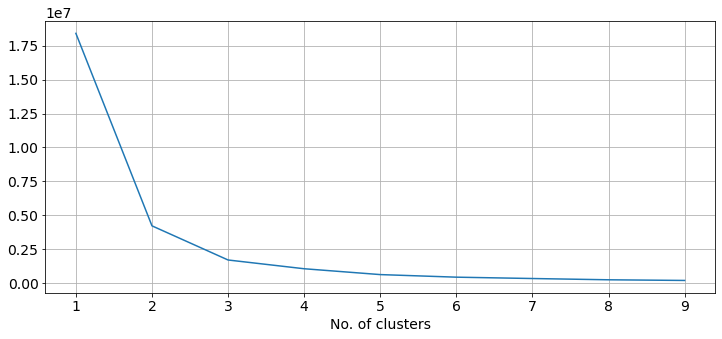

In [34]:
sse={}
customer_recency = customer_seg1[['Recency']]
for k in range(1,10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(customer_recency)
    customer_recency['clusters'] = kmeans.labels_
    sse[k] = kmeans.inertia_
    
plt.figure(figsize=(12,5))
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel('No. of clusters')
plt.show()

In [35]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(customer_seg1[['Recency']])
customer_seg1['Recency_cluster'] = kmeans.predict(customer_seg1[['Recency']])

#function for ordering cluster numbers
def order_cluster(cluster_field_name, target_field_name,df,ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final

customer_seg1 = order_cluster('Recency_cluster', 'Recency',customer_seg1,False)

In [153]:
customer_seg1.groupby('Recency_cluster')['Recency'].describe()

,count,mean,std,min,25%,50%,75%,max
Recency_cluster,,,,,,,,
0,804.0,154.568408,13.278942,133.0,143.0,153.0,166.0,181.0
1,909.0,110.100110,12.405319,90.0,100.0,109.0,121.0,132.0
2,1319.0,68.329795,10.811235,51.0,59.0,67.0,77.5,89.0
3,1564.0,31.895141,7.452936,21.0,26.0,31.0,37.0,50.0
4,2844.0,8.893460,5.938858,0.0,4.0,8.0,14.0,20.0


### Frequency

In [36]:
customer_seg2 = pd.DataFrame(data['USER_ID'])
customer_seg2.columns = ['USER_ID']

cust_frequency = data.groupby('USER_ID').recent_Purchase_date.count().reset_index()
cust_frequency.columns = ['USER_ID','frequency']

customer_seg2 = pd.merge(customer_seg2,cust_frequency, on='USER_ID')

In [37]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(customer_seg2[['frequency']])
customer_seg2['frequency_cluster'] = kmeans.predict(customer_seg2[['frequency']])

customer_seg2 = order_cluster('frequency_cluster','frequency', customer_seg2,True)
customer_seg2.groupby('frequency_cluster')['frequency'].describe()


,count,mean,std,min,25%,50%,75%,max
frequency_cluster,,,,,,,,
0,7440.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0


### Revenue

In [38]:
customer_seg3 = pd.DataFrame(data['USER_ID'])
customer_seg3.columns = ['USER_ID']

cust_revenue = data.groupby('USER_ID').Price.sum().reset_index()


customer_seg3 = pd.merge(customer_seg3,cust_revenue, on='USER_ID')

In [39]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(customer_seg3[['Price']])
customer_seg3['revenue_cluster'] = kmeans.predict(customer_seg3[['Price']])

customer_seg3 = order_cluster('revenue_cluster','Price', customer_seg3,True)
customer_seg3.groupby('revenue_cluster')['Price'].describe()

,count,mean,std,min,25%,50%,75%,max
revenue_cluster,,,,,,,,
0,7430.0,6.938964e+06,7.483810e+07,-1.251855e+05,1.609538e+04,1.132724e+05,6.556699e+05,2.418044e+09
1,5.0,5.371774e+09,1.217705e+09,4.261303e+09,4.555231e+09,4.704371e+09,6.337014e+09,7.000951e+09
2,2.0,1.366128e+10,1.700823e+09,1.245861e+10,1.305995e+10,1.366128e+10,1.426261e+10,1.486394e+10
3,1.0,2.205344e+10,NaN,2.205344e+10,2.205344e+10,2.205344e+10,2.205344e+10,2.205344e+10
4,1.0,9.482337e+10,NaN,9.482337e+10,9.482337e+10,9.482337e+10,9.482337e+10,9.482337e+10
5,1.0,1.029669e+11,NaN,1.029669e+11,1.029669e+11,1.029669e+11,1.029669e+11,1.029669e+11


In [40]:
customer = pd.concat([customer_seg1,customer_seg2,customer_seg3],axis=1).reset_index()
customer

,index,USER_ID,Recency,Recency_cluster,USER_ID,frequency,frequency_cluster,USER_ID,Price,revenue_cluster
0,0,347,3,4,347,1,0,347,1.017555e+04,0
1,1,1670,3,4,885,1,0,885,1.009635e+06,0
2,2,4692,20,4,1670,1,0,1670,5.859671e+06,0
3,3,4784,13,4,4468,1,0,4468,7.891355e+04,0
4,4,7611,2,4,4682,1,0,4682,9.921610e+06,0
...,...,...,...,...,...,...,...,...,...,...
7435,7435,122348571,151,0,122500642,1,0,117143673,6.337014e+09,1
7436,7436,122360338,164,0,122509301,1,0,9153891,1.245861e+10,2
7437,7437,122404078,175,0,122509396,1,0,70562515,1.486394e+10,2
7438,7438,122494989,150,0,122510097,1,0,9637333,1.029669e+11,5


In [41]:
customers = ['USER_ID','Recency','Recency_cluster','frequency','frequency_cluster','Price','revenue_cluster']

In [42]:
customer_data = customer[customers]

In [43]:
cust_data = customer_data.iloc[:,2:9]

In [44]:
cust_data

,USER_ID,Recency,Recency_cluster,frequency,frequency_cluster,Price,revenue_cluster
0,347,3,4,1,0,1.017555e+04,0
1,885,3,4,1,0,1.009635e+06,0
2,1670,20,4,1,0,5.859671e+06,0
3,4468,13,4,1,0,7.891355e+04,0
4,4682,2,4,1,0,9.921610e+06,0
...,...,...,...,...,...,...,...
7435,117143673,151,0,1,0,6.337014e+09,1
7436,9153891,164,0,1,0,1.245861e+10,2
7437,70562515,175,0,1,0,1.486394e+10,2
7438,9637333,150,0,1,0,1.029669e+11,5


In [45]:
cust_data.columns = ['USER_ID', 'Recency', 'Recency_cluster', 'frequency', 'frequency_cluster', 'Price', 'revenue_cluster']
cust_data['OverallScore'] = customer_seg1['Recency_cluster'] +customer_seg2['frequency_cluster'] + customer_seg3['revenue_cluster']
cust_data.groupby('OverallScore')['Recency','frequency','Price'].mean()

,Recency,frequency,Price
OverallScore,,,
0,154.525189,1.0,4.773067e+06
1,110.339168,1.0,3.583975e+07
2,68.482967,1.0,2.511784e+07
3,31.978914,1.0,1.986326e+07
4,8.946221,1.0,4.281220e+07
5,150.000000,1.0,1.029669e+11


In [46]:
cust_data['Segment'] = 'Low_Value'
cust_data.loc[cust_data['OverallScore']>2,'Segment'] = 'Mid_Value'
cust_data.loc[cust_data['OverallScore']>4,'Segment'] = 'High_Value'

In [47]:
cust_data

,USER_ID,Recency,Recency_cluster,frequency,frequency_cluster,Price,revenue_cluster,OverallScore,Segment
0,347,3,4,1,0,1.017555e+04,0,4,Mid_Value
1,885,3,4,1,0,1.009635e+06,0,4,Mid_Value
2,1670,20,4,1,0,5.859671e+06,0,4,Mid_Value
3,4468,13,4,1,0,7.891355e+04,0,4,Mid_Value
4,4682,2,4,1,0,9.921610e+06,0,4,Mid_Value
...,...,...,...,...,...,...,...,...,...
7435,117143673,151,0,1,0,6.337014e+09,1,1,Low_Value
7436,9153891,164,0,1,0,1.245861e+10,2,2,Low_Value
7437,70562515,175,0,1,0,1.486394e+10,2,2,Low_Value
7438,9637333,150,0,1,0,1.029669e+11,5,5,High_Value


### Regression - Classificaiton

In [50]:
data.columns

Index(['USER_ID', 'Gender', 'first_Date', 'recent_date', 'Customer_value',
       'buy_times', 'Points_earned', 'Points_redeemed', 'no_baskets', 'qty',
       ...
       'redeem_flag', 'Promo_seeker_flag', 'Decile_Sale_amt', 'Decile_Margin',
       'CustomerSegment', 'High_Spender_flag', 'Churn_flag',
       'first_Purchase_Date', 'recent_Purchase_date', 'Price'],
      dtype='object', length=121)

In [55]:
cat_cols = ['Gender']

In [56]:
data = pd.get_dummies(data, columns=cat_cols, drop_first=True)

In [57]:
import statsmodels.formula.api as sm
from sklearn.model_selection import train_test_split

In [86]:
train,test = train_test_split(data, test_size =0.3, random_state =123)

In [87]:
train.shape

(5208, 122)

In [88]:
test.shape

(2232, 122)

In [89]:
logreg = sm.logit('Churn_flag~Customer_value+qty+Price', data=train).fit()

Optimization terminated successfully.
         Current function value: 0.001555
         Iterations 20


In [90]:
from sklearn import metrics

In [91]:
## Sommers D

In [92]:
metrics.roc_auc_score(train['Churn_flag'],logreg.predict(train))

0.9863645093143845

In [93]:
metrics.roc_auc_score(test['Churn_flag'],logreg.predict(test))

ValueError: Only one class present in y_true. ROC AUC score is not defined in that case.

In [94]:
train_sommersD = 2*metrics.roc_auc_score(train['Churn_flag'],logreg.predict(train))-1
print('sommersd for train data set is:', train_sommersD)

test_sommersD = 2*metrics.roc_auc_score(test['Churn_flag'],logreg.predict(test))-1
print('sommersd for test data set is:', test_sommersD)


sommersd for train data set is: 0.9727290186287689


ValueError: Only one class present in y_true. ROC AUC score is not defined in that case.

In [95]:
## AUC Score

In [96]:
train_auc = metrics.roc_auc_score(train['Churn_flag'],logreg.predict(train))
print('AUC score for train data set is:', round(train_auc,3))


test_auc = metrics.roc_auc_score(test['Churn_flag'],logreg.predict(test))
print('AUC score for test data set is:', round(test_auc,3))


AUC score for train data set is: 0.986


ValueError: Only one class present in y_true. ROC AUC score is not defined in that case.

In [97]:
train_pred_prob = pd.DataFrame(logreg.predict(train))
train_pred_prob.columns = ['prob']
train_actual = train['Churn']
train_predict = pd.concat([train_actual,train_pred_prob],axis=1)

KeyError: 'Churn'

In [98]:
test_pred_prob = pd.DataFrame(logreg.predict(test))
test_pred_prob.columns = ['prob']
test_actual = train['Churn_flag']
test_predict = pd.concat([test_actual,test_pred_prob],axis=1)

In [99]:
train_predict['predicted'] = train_predict['prob'].apply(lambda x:0.0 if x<0.5 else 1.0)

NameError: name 'train_predict' is not defined

In [100]:
## confusion matrix

In [101]:
train_pred_prob = pd.DataFrame(logreg.predict(train))
train_pred_prob.columns = ['prob']
train_actual = train['Churn_flag']
train_predict2 = pd.concat([train_actual,train_pred_prob],axis=1)

In [102]:
train_predict2['predicted'] = train_predict['prob'].apply(lambda x:0.0 if x<0.265306 else 1.0)

NameError: name 'train_predict' is not defined

In [103]:
test_pred_prob = pd.DataFrame(logreg.predict(test))
test_pred_prob.columns = ['prob']
test_actual = test['Churn_flag']
test_predict2 = pd.concat([test_actual,test_pred_prob],axis=1)

In [104]:
test_predict2['predicted'] = test_predict['prob'].apply(lambda x:0.0 if x<0.265306 else 1.0)

In [105]:
### calculating KS value and comming up with deciles

In [106]:
## Train

In [107]:
train_predict2['Deciles'] =pd.qcut(train_predict2['prob'],10,labels=False)

In [108]:
train_predict2

,Churn_flag,prob,Deciles
6165,0,0.000080,2
4589,0,0.000143,7
5170,0,0.000101,5
6120,0,0.000110,5
2295,0,0.000115,6
...,...,...,...
5218,0,0.000075,1
4060,0,0.000082,2
1346,0,0.000153,7
3454,0,0.000158,7


In [109]:
no_1s = train_predict2[['Deciles','Churn_flag']].groupby(train_predict2.Deciles).sum().sort_index(ascending=False)['Churn_flag']
no_total = train_predict2[['Deciles','Churn_flag']].groupby(train_predict2.Deciles).count().sort_index(ascending=False)['Churn_flag']
max_prob = train_predict2[['Deciles','prob']].groupby(train_predict2.Deciles).max().sort_index(ascending=False)['prob']
min_prob = train_predict2[['Deciles','prob']].groupby(train_predict2.Deciles).min().sort_index(ascending=False)['prob']

In [110]:
Decile_analysis_train = pd.concat([min_prob,max_prob,no_1s,no_total-no_1s,no_total],axis=1)

In [111]:
Decile_analysis_train.columns = ['Min_prob','Max_prob','#1','#0','Total']

In [112]:
Decile_analysis_train.reset_index()

,Deciles,Min_prob,Max_prob,#1,#0,Total
0,9,0.000234,0.155517,1,520,521
1,8,0.000158,0.000234,0,521,521
2,7,0.000129,0.000158,0,521,521
3,6,0.000111,0.000129,0,520,520
4,5,0.000100,0.000111,0,521,521
5,4,0.000091,0.000100,0,521,521
6,3,0.000084,0.000091,0,520,520
7,2,0.000079,0.000084,0,521,521
8,1,0.000074,0.000079,0,521,521
9,0,0.000000,0.000074,0,521,521


### test

In [113]:
test_predict2['Deciles'] =pd.qcut(test_predict2['prob'],10,labels=False)

In [114]:
no_1s = test_predict2[['Deciles','Churn']].groupby(test_predict2.Deciles).sum().sort_index(ascending=False)['Churn']
no_total = test_predict2[['Deciles','Churn']].groupby(test_predict2.Deciles).count().sort_index(ascending=False)['Churn']
max_prob = test_predict2[['Deciles','prob']].groupby(test_predict2.Deciles).max().sort_index(ascending=False)['prob']
min_prob = test_predict2[['Deciles','prob']].groupby(test_predict2.Deciles).min().sort_index(ascending=False)['prob']

KeyError: "['Churn'] not in index"

In [115]:
Decile_analysis_test = pd.concat([min_prob,max_prob,no_1s,no_total-no_1s,no_total],axis=1)

In [116]:
Decile_analysis_test.columns = ['Min_prob','Max_prob','#1','#0','Total']

In [117]:
Decile_analysis_test.reset_index()

,Deciles,Min_prob,Max_prob,#1,#0,Total
0,9,0.000234,0.155517,1,520,521
1,8,0.000158,0.000234,0,521,521
2,7,0.000129,0.000158,0,521,521
3,6,0.000111,0.000129,0,520,520
4,5,0.000100,0.000111,0,521,521
5,4,0.000091,0.000100,0,521,521
6,3,0.000084,0.000091,0,520,520
7,2,0.000079,0.000084,0,521,521
8,1,0.000074,0.000079,0,521,521
9,0,0.000000,0.000074,0,521,521
